In [1]:
exec(open("init_notebook.py").read())
%load_ext autoreload
%autoreload 2

current working dirC:\muktadir\netmad\netmad


In [2]:
from sim.LoopSimulator import LoopSimulator
from model.Sender import Sender
from model.Path import Path
from model.BottleNeckPath import BottleNeckPath
from model.NoobSender import NoobSender
from model.TTLObserverSender import TTLObserverSender
import pprint
import logging
logging.basicConfig(level=logging.INFO)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [69]:
path = BottleNeckPath(maxArrivalRate=15,
                      maxDeliveryRate=10,
                      avgTTL=20, noiseMax=20, maxDataInPipe=10000, maxQsize=10000, debug=False)
simulator = LoopSimulator(path, printStatFreq=100)
deliveryRate = 50
# sender = NoobSender(simulator.createSenderId(), deliveryRate, debug=False)
sender = TTLObserverSender(simulator.createSenderId(), deliveryRate, debug=False, goalTTL=50)
simulator.senders[sender.id] = sender
simulator.run(2000)


INFO:root:Maximum data in pipe is around (maxDeliveryRate * avgPacketSize * avgTTL) = 6.0 KB
INFO:root:Maximum data in flight can be around (pipe-data + queue-data) = 306.0 KB
INFO:root:Optimal data in flight = 6.0 KB
INFO:root:
************Time step: 100*********
INFO:root:Packets in-flight: 782
INFO:root:Data in-flight: 15.64KB
INFO:root:packetsInQueue: 495
INFO:root:
************Time step: 200*********
INFO:root:Packets in-flight: 545
INFO:root:Data in-flight: 10.9KB
INFO:root:packetsInQueue: 266
INFO:root:
************Time step: 300*********
INFO:root:Packets in-flight: 95
INFO:root:Data in-flight: 1.9KB
INFO:root:packetsInQueue: 0
INFO:root:
************Time step: 400*********
INFO:root:Packets in-flight: 495
INFO:root:Data in-flight: 9.9KB
INFO:root:packetsInQueue: 212
INFO:root:
************Time step: 500*********
INFO:root:Packets in-flight: 141
INFO:root:Data in-flight: 2.82KB
INFO:root:packetsInQueue: 0
INFO:root:
************Time step: 600*********
INFO:root:Packets in-fligh

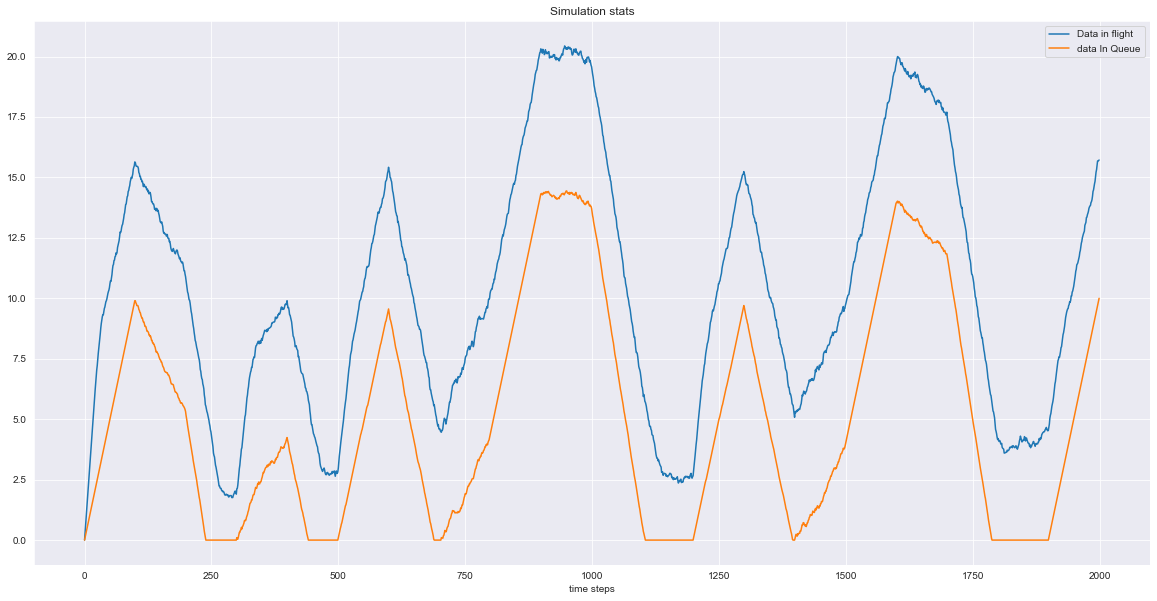

In [70]:
plt.figure(figsize=(20,10))
plt.plot(simulator.stats['dataInFlight'], label="Data in flight")
plt.plot(simulator.stats['dataInQueue'], label="data In Queue")
# plt.plot(simulator.stats['packetsInFlight'], label="Packet in flight")
# plt.plot(simulator.stats['packetsInQueue'], label="packets In Queue")
# plt.plot(simulator.stats['packetsSent'], label="Packets Sent")
# plt.plot(simulator.stats['packetsAcked'], label="Packet Acked")
# plt.plot(simulator.stats['totalPacketsSent'], label="Total packets Sent")
# plt.plot(simulator.stats['totalPacketsAcked'], label="Total packet Acked")
plt.title("Simulation stats")
plt.xlabel("time steps")
plt.legend()
plt.show()


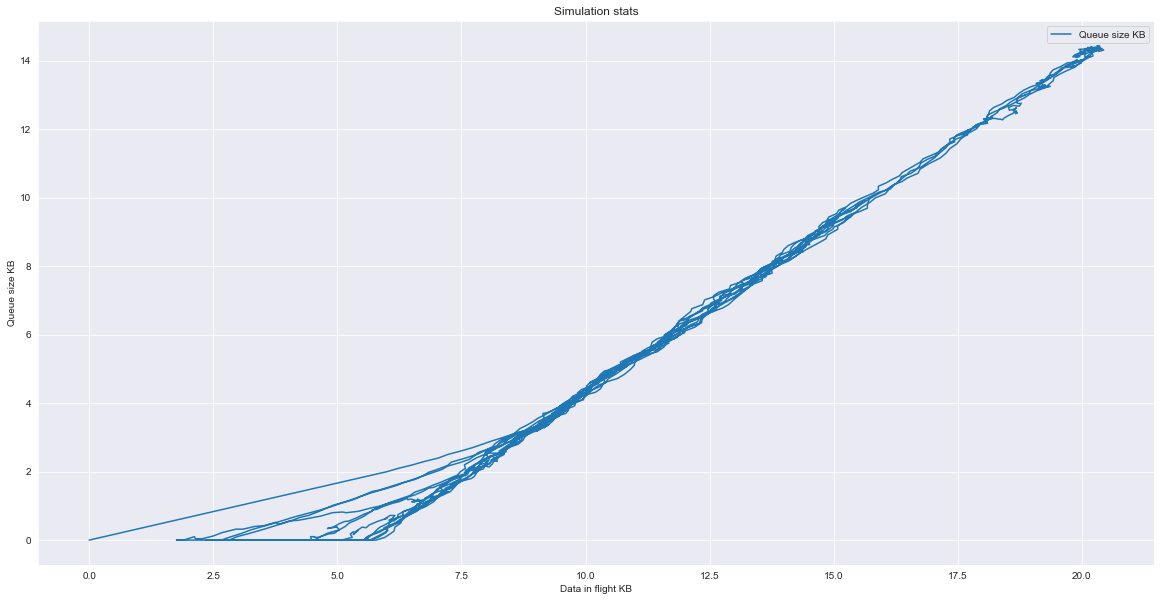

In [71]:
plt.figure(figsize=(20,10))
plt.plot(simulator.stats['dataInFlight'], simulator.stats['dataInQueue'], label="Queue size KB")
plt.title("Simulation stats")
plt.xlabel("Data in flight KB")
plt.ylabel("Queue size KB")
plt.legend()
plt.show()

In [72]:
from sim.AnalyzerTools import AnalyzerTools
analyzerTools = AnalyzerTools()
packetStats = analyzerTools.createDfFromPackets(sender.ackedPackets)

<AxesSubplot:xlabel='ttl', ylabel='Count'>

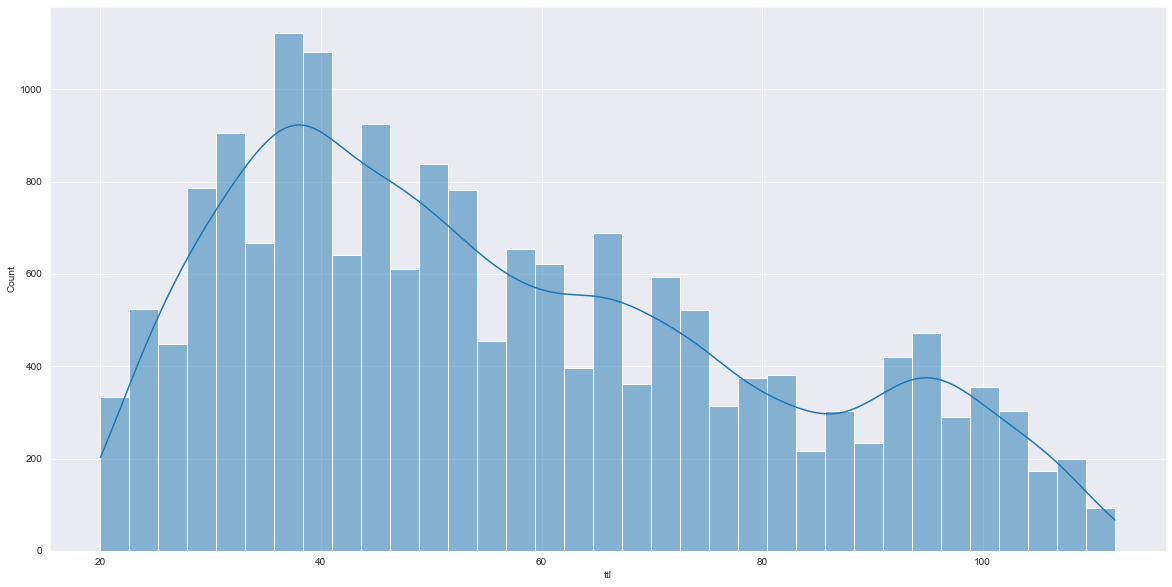

In [73]:

plt.figure(figsize=(20,10))
sns.histplot(packetStats.ttl, kde=True)

[Text(0.5, 0, 'Data in flight KB'), Text(0, 0.5, '# timeSteps')]

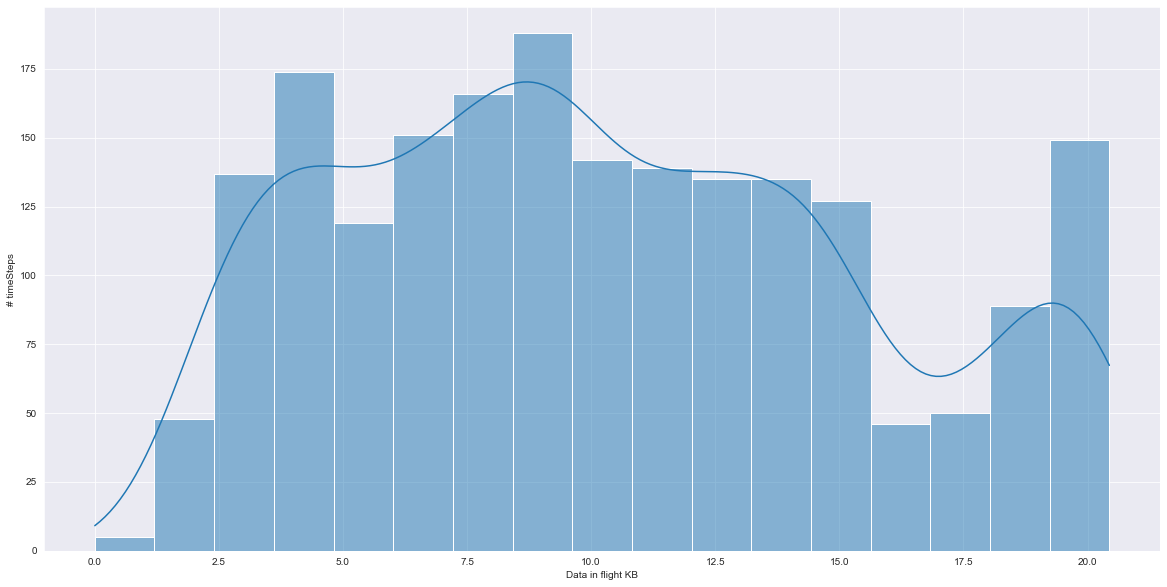

In [80]:

plt.figure(figsize=(20,10))
ax = sns.histplot(simulator.stats['dataInFlight'], kde=True)
ax.set(xlabel="Data in flight KB", ylabel="# timeSteps")

[Text(0.5, 0, 'Data in Queue KB'), Text(0, 0.5, '# timeSteps')]

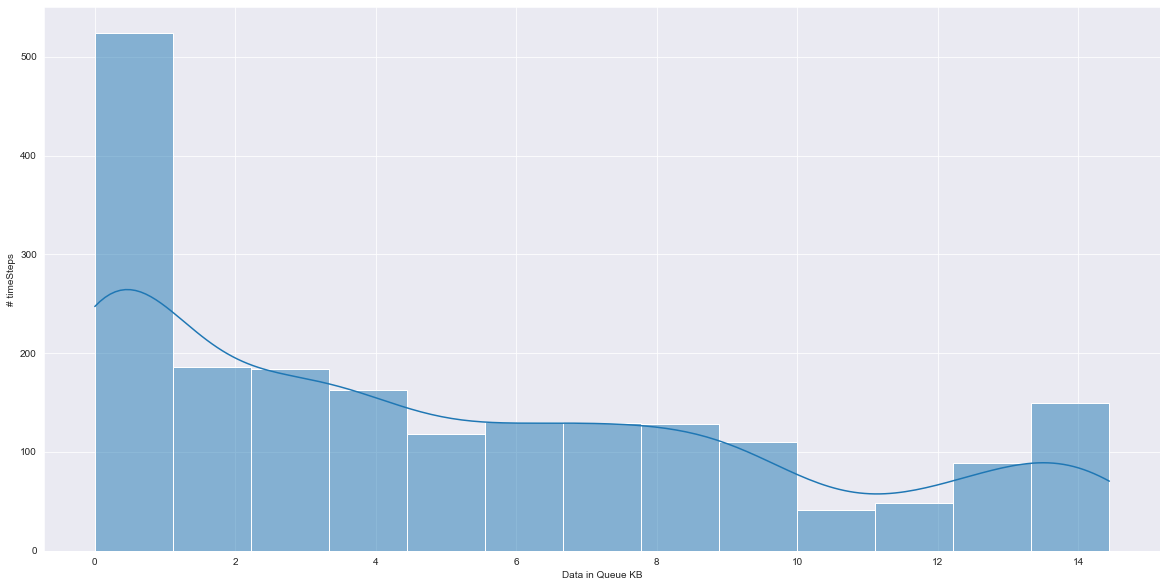

In [81]:

plt.figure(figsize=(20,10))
ax = sns.histplot(simulator.stats['dataInQueue'], kde=True)
ax.set(xlabel="Data in Queue KB", ylabel="# timeSteps")

In [46]:

# plt.figure(figsize=(20,10))
# sns.lineplot(data = packetStats, x='packNum', y='ttl', color='g')

In [47]:
from sim.AnalyzerTools import AnalyzerTools
analyzerTools = AnalyzerTools()
dfPackets = analyzerTools.createDfFromPackets(sender.ackedPackets)

In [48]:
# dfPackets.head()

In [49]:
# print(simulator.stats.keys())
dfStats = analyzerTools.getSenderStatsPerTimeStep(dfPackets, simulator.stats)

In [50]:
# dfStats.head()

In [51]:
# dfStats.tail()

<AxesSubplot:title={'center':'Stats of ACKs'}, xlabel='time Steps of ACKs'>

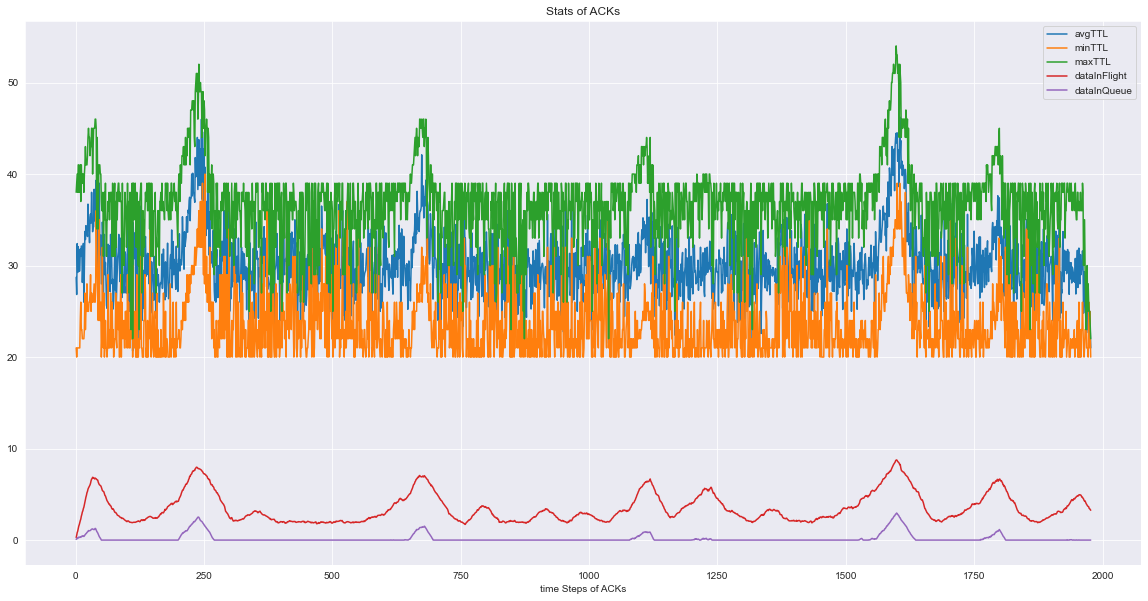

In [52]:
dfStats.plot(figsize=(20,10), xlabel="time Steps of ACKs", title="Stats of ACKs")

In [53]:
# # data in flight vs others

# plt.figure(figsize=(20,10))
# print( len(simulator.stats['dataInFlight']))
# print( dfStats['avgTTL'].shape)
# # sns.lineplot(data=dfStats, x='dataInFlight')

# plt.figure(figsize=(20,10))
# plt.plot(dfStats['dataInFlight'], dfStats['avgTTL'], label="avg ttl")
# plt.plot(dfStats['dataInFlight'], dfStats['maxTTL'], label="max ttl")
# plt.plot(dfStats['dataInFlight'], dfStats['dataInQueue'], label="dataInQueue")
# plt.title("Simulation stats")
# plt.xlabel("Data in flight KB")
# plt.ylabel("ttl in ms")
# plt.legend()
# plt.show()

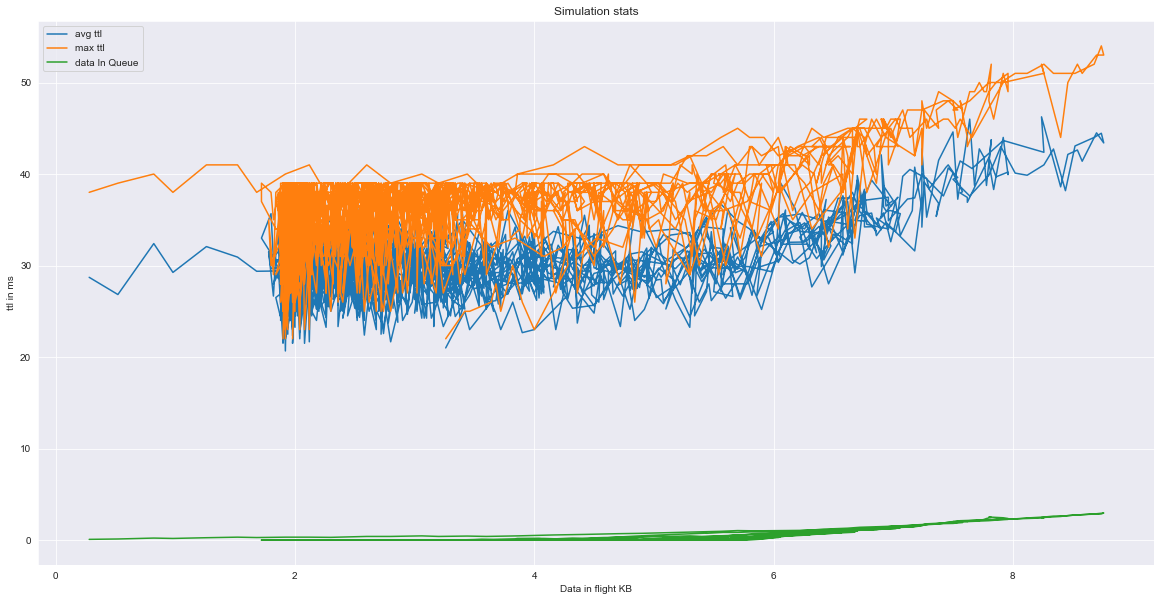

In [54]:
analyzerTools.createPlotsAgainstDataInFlight(dfStats)